# **Global Youtube Analysis**

**The purpose** of this project is to conduct exploratory data analysis on a provided data set and provide valuable insights through visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
    - Data Discovery
    - Data Cleaning and Validing
    - Data Structuring
    - Data Engineering

**Part 3:** Building visualizations

**Part 4:** Evaluate and communicate insights with stakeholders

    - What key business insight(s) emerged?
    - What business recommendations do you propose based on your results?

# Part 1: Import, links, and loading

In [1]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import datetime as dt
from wordcloud import WordCloud

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# statistics
from scipy.stats import linregress  # Import linregress from scipy.stats

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Global YouTube Statistics.csv')

# Part 2: Data Exploration

In [3]:
# first 5 rows of how our data look like
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


**Observation**

In order to improve readability, enhanced communication and professional presentation, it would be wise to employ scaling techniques that convert large numerical values into thousands or millions on columns
- subscribers
- video views
- video_views_for_the_last_30_days
- subscribers_for_last_30_days
- Population
- Urban_population

In [4]:
# basic statisic of our data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,995.0,4.980000e+02,2.873761e+02,1.000000e+00,2.495000e+02,4.980000e+02,7.465000e+02,9.950000e+02
subscribers,995.0,2.298241e+07,1.752611e+07,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video views,995.0,1.103954e+10,1.411084e+10,0.000000e+00,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,995.0,9.187126e+03,3.415135e+04,0.000000e+00,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
video_views_rank,994.0,5.542489e+05,1.362782e+06,1.000000e+00,3.230000e+02,9.155000e+02,3.584500e+03,4.057944e+06
country_rank,879.0,3.860535e+02,1.232245e+03,1.000000e+00,1.100000e+01,5.100000e+01,1.230000e+02,7.741000e+03
channel_type_rank,962.0,7.457193e+02,1.944387e+03,1.000000e+00,2.700000e+01,6.550000e+01,1.397500e+02,7.741000e+03
video_views_for_the_last_30_days,939.0,1.756103e+08,4.163782e+08,1.000000e+00,2.013750e+07,6.408500e+07,1.688265e+08,6.589000e+09
lowest_monthly_earnings,995.0,3.688615e+04,7.185872e+04,0.000000e+00,2.700000e+03,1.330000e+04,3.790000e+04,8.509000e+05
highest_monthly_earnings,995.0,5.898078e+05,1.148622e+06,0.000000e+00,4.350000e+04,2.127000e+05,6.068000e+05,1.360000e+07


**Observation**

There are youtubers with 0 uploads that need to be cleaned

our data dates back to 1970 but youtube was created in 2005 so we need to set a condition on created_year >= 2005

In [5]:
# size of our data & column dtypes
print(df.shape)
print('')
print(df.info())
print('')

def check_missing_values(column):
    nan_percentage = df[column].isnull().sum() / df[column].size
    print(f'"{column}" column consists of {nan_percentage:.2%} missing values.')

for column in df.columns:
    check_missing_values(column)

(995, 28)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                       

**Observation**

This is 995 rows in every column but some columns have less than 995 counts which means there are null values that need to be cleaned especially for subscribers_for_last_30_days which only has 658 non-null counts. This could possible mean that those Youtuber are no longer active and is not gaining any subscribers.

The data types within the dataset appear to be appropriately configured

In [6]:
dict_={}
for feature in df.columns:
    dict_[feature]=df[feature].value_counts().shape[0]
pd.DataFrame(dict_,index=['unique_counts']).transpose()

,unique_counts
rank,995
Youtuber,995
subscribers,289
video views,988
category,18
Title,992
uploads,777
Country,49
Abbreviation,49
channel_type,14


**Observation**

We have a information of about 995 youtubers, from 18 different categories and from 49 countries over the world.

In [7]:
# data engineering
df['average_yearly_earnings(k)'] = (df['lowest_yearly_earnings']+df['highest_yearly_earnings'])/2000
df['subs(m)'] = df['subscribers'] / 1000000
df['views(m)'] = df['video views'] / 1000000
df['loyalty'] = (df['video views'] / df['uploads']) / df['subscribers']
df['loyalty'] = pd.to_numeric(df['loyalty'].where((df['video views'] > 0) & (df['uploads'] > 0) & (df['subscribers'] > 0), None))
df['subs_last_30days(k)'] = df['subscribers_for_last_30_days'] / 1000
df['view-to-subscriber ratio'] = df['video views'] / df['subscribers']
df['youtuber popularity in country'] = df['subscribers'] / df['Population']

In [8]:
# dropping unwanted columns
columns_to_drop = [
    'Abbreviation','created_month', 'created_date','Gross tertiary education enrollment (%)',
    'Unemployment rate', 'Urban_population', 'lowest_yearly_earnings', 'video_views_for_the_last_30_days',
    'lowest_monthly_earnings', 'highest_yearly_earnings','highest_monthly_earnings', 'country_rank', 'subscribers',
    'video views', 'channel_type_rank', 'Longitude', 'Latitude', 'rank'
]

df.drop(columns=columns_to_drop, inplace=True)

# changing column names
new_column_names = {
    'channel_type': 'type',
    'video_views_rank': 'views_rank',
}

df.rename(columns=new_column_names, inplace=True)
df.columns = df.columns.str.lower()

In [9]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned[(df_cleaned.uploads > 0) & (df_cleaned.created_year > 2005)]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 994
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   youtuber                        539 non-null    object 
 1   category                        539 non-null    object 
 2   title                           539 non-null    object 
 3   uploads                         539 non-null    int64  
 4   country                         539 non-null    object 
 5   type                            539 non-null    object 
 6   views_rank                      539 non-null    float64
 7   subscribers_for_last_30_days    539 non-null    float64
 8   created_year                    539 non-null    float64
 9   population                      539 non-null    float64
 10  average_yearly_earnings(k)      539 non-null    float64
 11  subs(m)                         539 non-null    float64
 12  views(m)                        539 

**Obseration**

We dropped 456 rows of missing data compare to 995 rows initally but only 658 are active youtubers so, in reality, we dropped 119 rows instead.

# Part 3: Data Visulization

### 3.1 What top 10 Country, Channel Types and Category have the most subscribers?

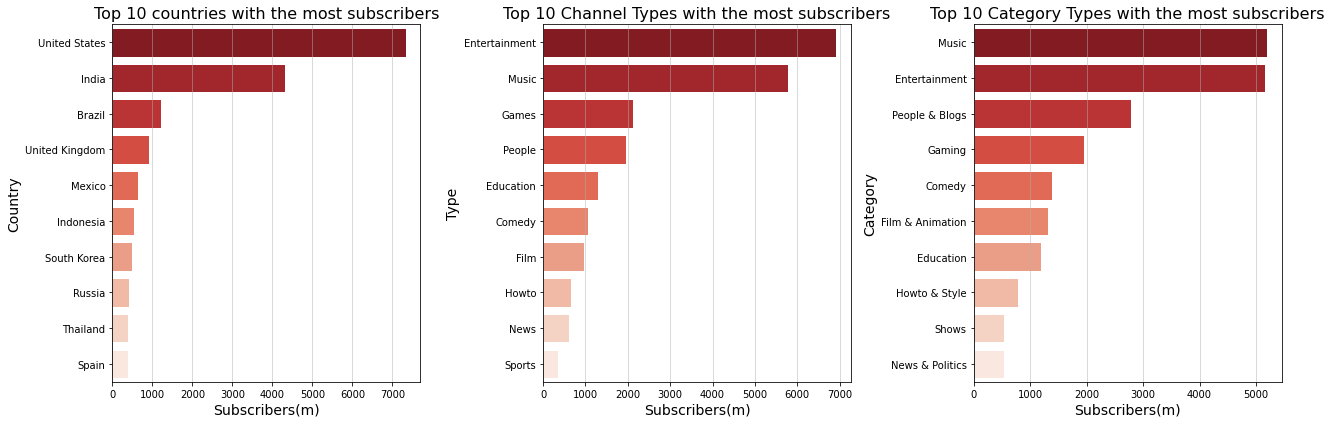

In [10]:
# Define the data and titles for the three subplots
plot_data = [
    (df.groupby(['country']), 'country', 'Top 10 countries with the most subscribers'),
    (df.groupby(['type']), 'type', 'Top 10 Channel Types with the most subscribers'),
    (df.groupby(['category']), 'category', 'Top 10 Category Types with the most subscribers')
]

# Create a single figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Customize the colors for all subplots
color_palette = sns.color_palette("Reds", n_colors=10)[::-1]

for i, (data, x_col, title) in enumerate(plot_data):
    with sns.axes_style("whitegrid"):
        sns.barplot(data=data['subs(m)'].sum().reset_index().sort_values(['subs(m)'], ascending=False).head(10), 
                    x='subs(m)', y=x_col, orient='h', palette=color_palette, ax=axes[i])
    axes[i].grid(axis='x', linestyle='-', alpha=0.6)  # Add gridlines
    axes[i].set_xlabel('Subscribers(m)', fontsize=14)
    axes[i].set_ylabel(x_col.capitalize(), fontsize=14)
    axes[i].set_title(title, fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

**United States, India, Brazil** are the top 3 countries with most subscribers

**Entertainment, Music, Games** are the top 3 Channel Types with most subscribers

**Music, Entertainment, People & blogs** are the top 3 Categories with most subscribers

## 3.2 What top 10 Country, Channel Types and Category is the most lucrative?

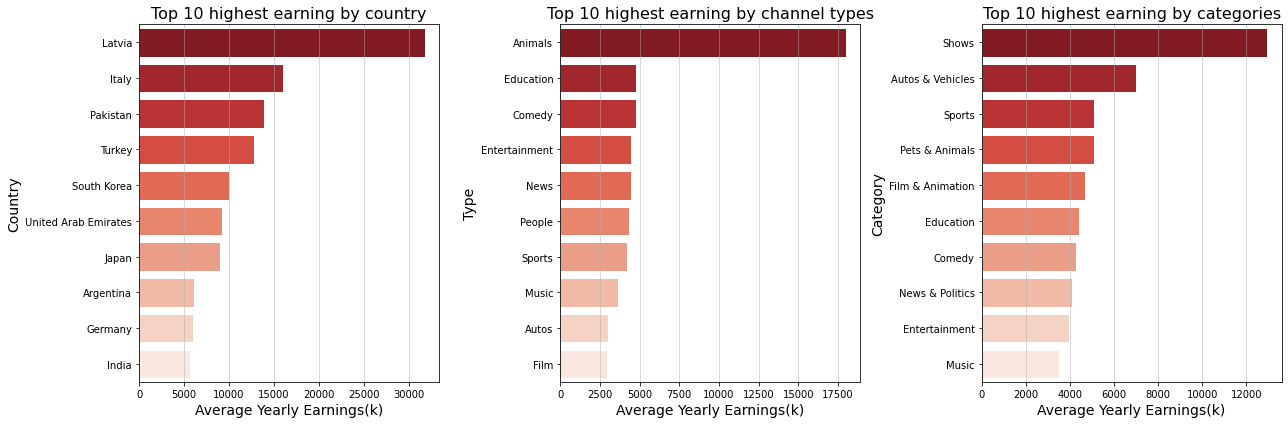

In [11]:
# Define the data and titles for the three subplots
plot_data = [
    (df.groupby(['country']), 'country', 'Top 10 highest earning by country'),
    (df.groupby(['type']), 'type', 'Top 10 highest earning by channel types'),
    (df.groupby(['category']), 'category', 'Top 10 highest earning by categories')
]

# Create a single figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Customize the colors for all subplots
color_palette = sns.color_palette("Reds", n_colors=10)[::-1]

for i, (data, x_col, title) in enumerate(plot_data):
    with sns.axes_style("whitegrid"):
        sns.barplot(data=data['average_yearly_earnings(k)'].mean().reset_index().sort_values(['average_yearly_earnings(k)'], ascending=False).head(10), 
                    x='average_yearly_earnings(k)', y=x_col, orient='h', palette=color_palette, ax=axes[i])
    axes[i].grid(axis='x', linestyle='-', alpha=0.6)  # Add gridlines
    axes[i].set_xlabel('Average Yearly Earnings(k)', fontsize=14)
    axes[i].set_ylabel(x_col.capitalize(), fontsize=14)
    axes[i].set_title(title, fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

**Latvia, Italy, Pakistan** are the top 3 countries that pays the most

**Animals, Education, Comedy** are the top 3 Channel Types that pays the most

**Shows, Autos & Vehicles, Sports** are the top 3 Categories that pays the most

### 3.3 What top 10 Country, Channel Types and Category have the highest loyalty ratio?

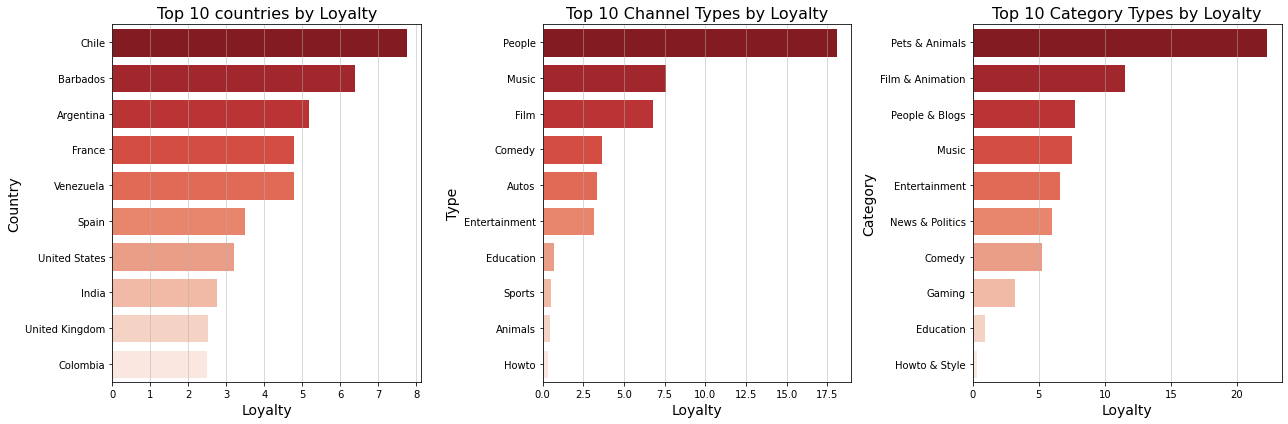

In [12]:
# Define the data for the three subplots
plots_data = [
    (df[df['uploads'] != 1].groupby(['country'])['loyalty'].mean().reset_index().sort_values('loyalty', ascending=False)[3:13], 'Top 10 countries by Loyalty'),
    (df[df['uploads'] != 1].groupby(['type'])['loyalty'].mean().reset_index().sort_values('loyalty', ascending=False)[:10], 'Top 10 Channel Types by Loyalty'),
    (df[df['uploads'] != 1].groupby(['category'])['loyalty'].mean().reset_index().sort_values('loyalty', ascending=False)[:10], 'Top 10 Category Types by Loyalty')
]

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Customize the colors
color_palette = sns.color_palette("Reds", n_colors=10)[::-1]

for i, (data, title) in enumerate(plots_data):
    with sns.axes_style("whitegrid"):
        sns.barplot(data=data, x='loyalty', y=data.columns[0], orient='h', palette=color_palette, ax=axes[i])
    axes[i].grid(axis='x', linestyle='-', alpha=0.6)
    axes[i].set_xlabel('Loyalty', fontsize=14)
    axes[i].set_ylabel(data.columns[0].capitalize(), fontsize=14)
    axes[i].set_title(title, fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

**Loyalty** is created by calculating the mean proportion of subscribers who watch the uploaded videos which gives us an understanding on the question: do the subscribers usually watches the new uploads from their subbed youtubers?

**Chile, Barbados, Argentina** are the top 3 countries that have the highest loyalty ratio

**People, Music, Film** are the top 3 Channel Types that have the highest loyalty ratio

**Pets & Animals, Film & Animation, People & Blogs** are the top 3 Categories that have the highest loyalty ratio

### 3.4 What top 10 Country, Channel Types and Category have the highest view-to-subscribers ratio?

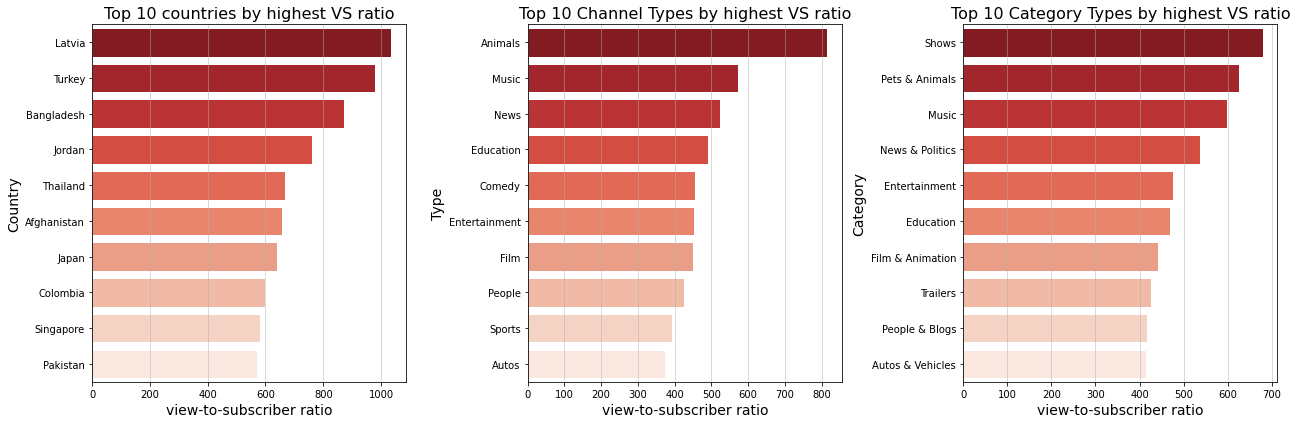

In [15]:
# Define the data and titles for the three subplots
plot_data = [
    (df.groupby(['country']), 'country', 'Top 10 countries by highest VS ratio'),
    (df.groupby(['type']), 'type', 'Top 10 Channel Types by highest VS ratio'),
    (df.groupby(['category']), 'category', 'Top 10 Category Types by highest VS ratio')
]

# Create a single figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Customize the colors for all subplots
color_palette = sns.color_palette("Reds", n_colors=10)[::-1]

for i, (data, x_col, title) in enumerate(plot_data):
    with sns.axes_style("whitegrid"):
        sns.barplot(data=data['view-to-subscriber ratio'].mean().reset_index().sort_values(['view-to-subscriber ratio'], ascending=False).head(10), 
                    x='view-to-subscriber ratio', y=x_col, orient='h', palette=color_palette, ax=axes[i])
    axes[i].grid(axis='x', linestyle='-', alpha=0.6)  # Add gridlines
    axes[i].set_xlabel('view-to-subscriber ratio', fontsize=14)
    axes[i].set_ylabel(x_col.capitalize(), fontsize=14)
    axes[i].set_title(title, fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

**Latvia, Turkey, Bangladesh** are the top 3 countries that the have highest view-to-subscribers ratio?

**Animals, Music, News** are the top 3 Channel Types that have the highest view-to-subscribers ratio?

**Shows, Pets & Animals, Music** are the top 3 Categories that have the highest view-to-subscribers ratio?

### 3.5 Which top 10 Youtubers are gaining the most subscribers in the past 30 days?

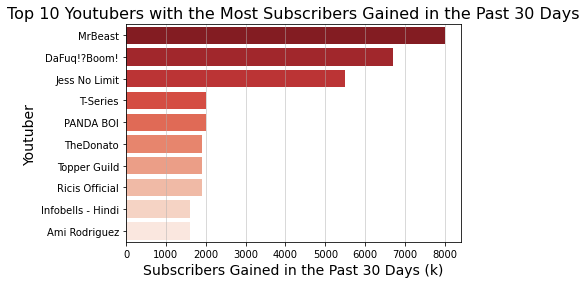

In [16]:
# Select the top 10 YouTubers with the most subscribers gained in the past 30 days
data = df_cleaned.sort_values(by='subs_last_30days(k)', ascending=False).head(10)

# Define a custom color palette in reverse order
color_palette = sns.color_palette("Reds", n_colors=10)[::-1]

# Create a horizontal bar plot using Seaborn
sns.barplot(data=data, y='youtuber', x='subs_last_30days(k)', orient='h', palette=color_palette)

# Set the plot title and labels
plt.title('Top 10 Youtubers with the Most Subscribers Gained in the Past 30 Days', fontsize=16)
plt.xlabel('Subscribers Gained in the Past 30 Days (k)', fontsize=14)
plt.ylabel('Youtuber', fontsize=14)

# Add gridlines to the x-axis for better readability
plt.grid(axis='x', linestyle='-', alpha=0.6)

# Display the plot
plt.show()

**MrBeast, DaFuq!?Boom!, Jess No Limit** gained the most subscribers in the past 30 d

### 3.6 What is the correlation between Video Views, Uploads, Subscribers against Yearly Earnings

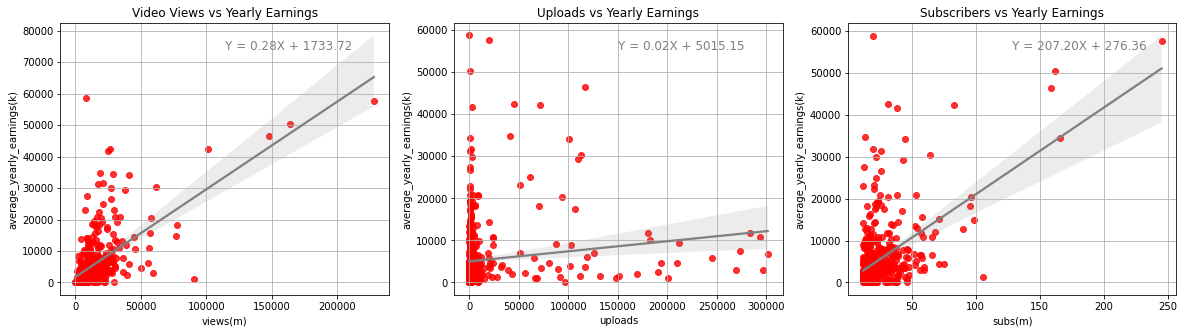

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Customize the line and point properties for all three subplots
line_props = {'color': 'grey'}
scatter_props = {'color': 'red'}

# Create the first subplot
sns.regplot(ax=axs[0], data=df_cleaned, x='views(m)', y='average_yearly_earnings(k)', line_kws=line_props, scatter_kws=scatter_props)
axs[0].grid(True)
axs[0].set_title('Video Views vs Yearly Earnings')

# Calculate the regression statistics for the first subplot
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df_cleaned['views(m)'], df_cleaned['average_yearly_earnings(k)'])
axs[0].annotate(f'Y = {slope1:.2f}X + {intercept1:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='grey')

# Create the second subplot
sns.regplot(ax=axs[1], data=df_cleaned, x='uploads', y='average_yearly_earnings(k)', line_kws=line_props, scatter_kws=scatter_props)
axs[1].grid(True)
axs[1].set_title('Uploads vs Yearly Earnings')

# Calculate the regression statistics for the second subplot
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df_cleaned['uploads'], df_cleaned['average_yearly_earnings(k)'])
axs[1].annotate(f'Y = {slope2:.2f}X + {intercept2:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='grey')

# Create the third subplot
sns.regplot(ax=axs[2], data=df_cleaned, x='subs(m)', y='average_yearly_earnings(k)', line_kws=line_props, scatter_kws=scatter_props)
axs[2].grid(True)
axs[2].set_title('Subscribers vs Yearly Earnings')

# Calculate the regression statistics for the third subplot
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(df_cleaned['subs(m)'], df_cleaned['average_yearly_earnings(k)'])
axs[2].annotate(f'Y = {slope3:.2f}X + {intercept3:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='grey')

plt.show()

**Video views** have moderate positive correlation with yearly earnings.
- For every **1 million** views, we can expect an increase of **280** in yearly earnings.

**Uploads** have weak moderate positive correlation with yearly earnings
- For every **1 upoads**, we can expect an increase of **20** in yearly earnings.

**Subscribers** have moderate positive correlation with yearly earnings
- For every **1 million** views, we can expect an increase of **207,200** in yearly earnings.

### 3.7 Who are the top 10 Youtubers by Subscribers?

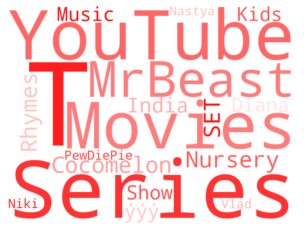

In [18]:
# WordCloud with top 10 youtubers in Red with the highest sub count youtuber the reddest along with a white backgroud

# Sort the DataFrame by 'subs(m)' in descending order to get the top subscribed YouTubers
df_sorted = df.sort_values(by='subs(m)', ascending=False)

# Extract the top 10 YouTubers
top_10_youtubers = df_sorted['youtuber'].head(10)

# Create a string with the names of the top 10 YouTubers
top_10_youtubers_str = ' '.join(top_10_youtubers)

# Define a custom colormap with red and white
colors = mcolors.LinearSegmentedColormap.from_list("custom_red_white", [(1, 1, 1), (1, 0, 0)])

# Generate and display the word cloud with the custom colormap
wordcloud = WordCloud(width=800, height=600, background_color='white', colormap=colors, collocations=False).generate(top_10_youtubers_str)

# Adjust the color of the WordCloud based on subscribers
plt.imshow(wordcloud.recolor(colormap=colors), interpolation='bilinear')
plt.axis('off')
plt.show()

Let's mix things up a bit and create a fun, visual playground for our top 10 YouTubers instead of the usual charts I displayed previously! After all, this is a personal project, not some boring business stuff. Let's turn these YouTube stars into a mesmerizing Word Cloud!

Wordcloud that shows the top 10 most subbed youtubers:
1.                      T-Series
2.                YouTube Movies
3.                       MrBeast
4.      Cocomelon-Nursery Rhymes
5.                     SET India
6.                         Music
7.           ýýý Kids Diana Show
8.                     PewDiePie
9.                   Like Nastya
10.                 Vlad and Niki

## 3.8 Which year are channels created in the dataset?

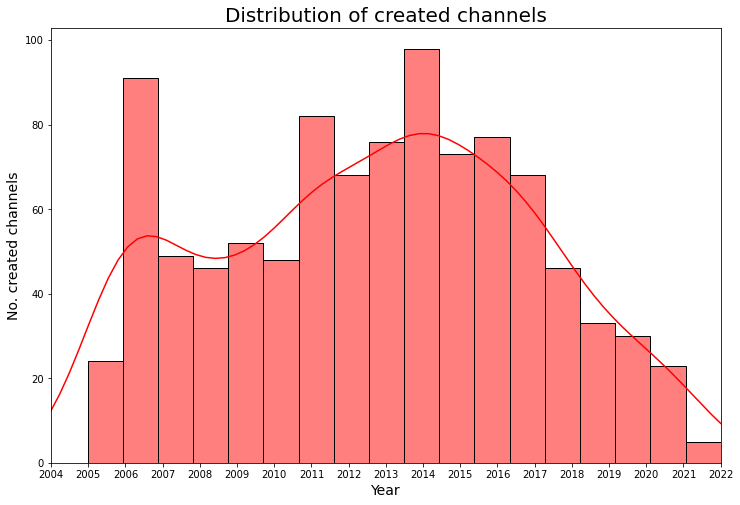

In [19]:
# Distribution of created channels with KDE
# Used old data from 2005 to 2023 because only channel creation year mattered so even if other columns are empty it is still good
plt.figure(figsize=(12, 8))

sns.histplot(data = df, x='created_year', bins=55, kde=True, color = 'red')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('No. created channels', fontsize = 14)
plt.title('Distribution of created channels', fontsize = 20)

plt.xticks(range(2004, 2023, 1))

plt.xlim(2004, 2022)

plt.show()

Most channels in our dataset are created in 2006 and in between 2011 - 2017.

# Part 4: Evaluate and communicate insights with stakeholders

## **Introduction:**

In this report, we present a detailed analysis of YouTube channel types and content categories, shedding light on their influence on subscribers, earnings, loyalty, and viewership. This analysis offers valuable insights for stakeholders in the YouTube community.

## 1. Monetisation Isn't about views, uploads, or subscribers!

Video Views and Yearly Earnings
* A weak positive correlation exists between video views and yearly earnings. For every 1 million views, content creators can anticipate an increase of 280 in yearly earnings.

Uploads and Yearly Earnings
* Uploads exhibit a weak to moderate positive correlation with yearly earnings. For every additional upload, content creators can expect an increase of 20 in yearly earnings.

Subscribers and Yearly Earnings
* Subscribers demonstrate a weak positive correlation with yearly earnings. Every 1 million new subscribers can lead to a substantial increase of 207,200 in yearly earnings.

Views, uploads, and subscribers do correlate with earnings but the relationship is not strong, especially not uploads.

It shows that **earnings can depend on many other factors** such as user engagent, video length, content, number of ads, trend, targeted audience, relevance of content etc. and not just views and subscribers alone.

The finding concludes that Youtubers should focus on **quality over quantity** in their views and explore on improving other factors mentioned.

## 2. What channels and categories make the most and why?


'Animals' channel and 'Shows' category offers the most monetization opportunities, even though 'Music' and 'Entertainment' are more popular with the most subscribers in both channel type and category.

Why? The reason is loyalty!

* Pets & Animals: Categories featuring pets and animals take the lead in loyalty ratios, underscoring the emotional connection viewers have with animals.
* Film & Animation: Film and animation categories secure the second position in loyalty ratios, highlighting the enduring appeal of visual storytelling.

Youtuber that want to have more monetization should focus on **creating contents that keep its subscribers coming back for more** and the most effective way to achieve this is **featuring animals** or **developing a film series**.

## 3. Global Trends:

In the YouTube space, the United States and India are two prominent players but it does not necessarily guarantee higher financial success or a greater loyalty ratio. However, it can lead to more views due to the popularity of **English** as the most widely watched language on YouTube.

## 4. Diversification:

In addtion to ad revenue, **explore options such as merchandise sales, partnership, sponsorships, affiliate marketing, contributions from fans, etc.**

Do not stick to Youtube only. Spread your presence in other widely used social media and content creating platforms such as tiktok, instagram, X(twitter), twitch, Bumble, etc.

Successful YouTubers often are in different platforms to market themselves and make revenue through mutiple sources.